In [15]:
#import data manipulation library
import pandas as pd
import numpy as np
#import data  library 
import seaborn as sns
import matplotlib.pyplot as plt
# import data filter warning 
import warnings
warnings.filterwarnings('ignore')

In [16]:
#import data
url='https://raw.githubusercontent.com/harshthorve284/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df=pd.read_csv(url)

df.sample(frac=1)#data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
12635,WH_112635,EID_62635,Rural,Small,South,Zone 6,5,1,2,5031,...,0,73,NaN,2012.0,21,1,A+,6,2,29078
2624,WH_102624,EID_52624,Rural,Mid,South,Zone 3,5,1,2,5333,...,1,172,NaN,NaN,5,0,A,2,19,6081
9893,WH_109893,EID_59893,Rural,Mid,South,Zone 3,6,0,2,3943,...,0,204,39.0,2002.0,25,0,B,6,19,31133
2623,WH_102623,EID_52623,Rural,Mid,North,Zone 3,3,0,2,4486,...,0,141,24.0,2000.0,38,1,B,3,27,49101
856,WH_100856,EID_50856,Rural,Mid,South,Zone 4,5,0,2,5704,...,0,241,40.0,2008.0,18,1,A+,6,26,23098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,WH_113557,EID_63557,Rural,Large,North,Zone 5,8,1,2,4640,...,1,141,38.0,1998.0,29,1,A+,6,24,38138
11483,WH_111483,EID_61483,Rural,Large,North,Zone 6,4,2,2,4327,...,1,240,27.0,2013.0,19,0,B,6,28,22104
21832,WH_121832,EID_71832,Rural,Large,North,Zone 6,0,4,2,5110,...,1,122,27.0,NaN,22,0,B+,5,6,26143
7390,WH_107390,EID_57390,Rural,Large,West,Zone 5,1,0,5,4306,...,1,112,34.0,NaN,36,0,A+,6,10,47086


In [17]:
# checking dta info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [18]:
#   data description analysis
'''the following data is found to be non norma distributed , since mean !=Median'''

df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


<function matplotlib.pyplot.show(close=None, block=None)>

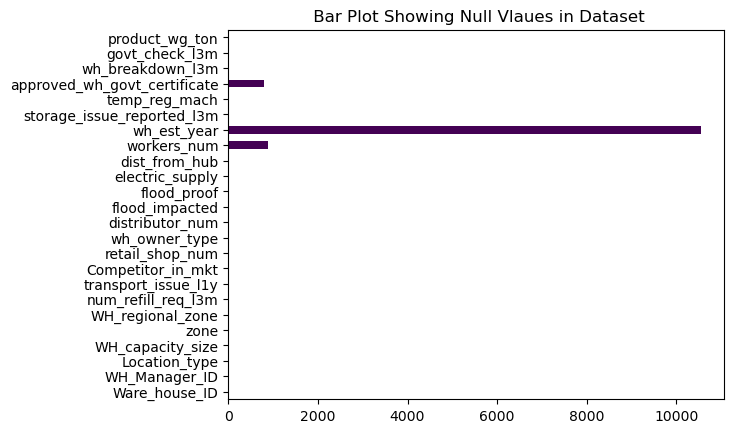

In [19]:
# checking the null values in datatset
df.isnull().sum().plot(kind='barh',cmap= 'viridis')
plt.title(' Bar Plot Showing Null Vlaues in Dataset')
plt.show

In [51]:
#ccalculate  missing value percentage :
(df['approved_wh_govt_certificate'].isnull().sum() / len(df['approved_wh_govt_certificate']))*100

3.6343115124153504

In [53]:
df['approved_wh_govt_certificate'].fillna('C',inplace=True)

In [7]:
(df['wh_est_year'].isnull().sum()/ len (df['wh_est_year']))*100

47.60722347629797

In [8]:
df['wh_est_year'].quantile (0.75),df['wh_est_year'].quantile (0.25)

(2016.0, 2003.0)

In [9]:
df['wh_est_year'].mean()

2009.4012063765617

In [10]:
df['wh_est_year'].median()

2009.0

In [11]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

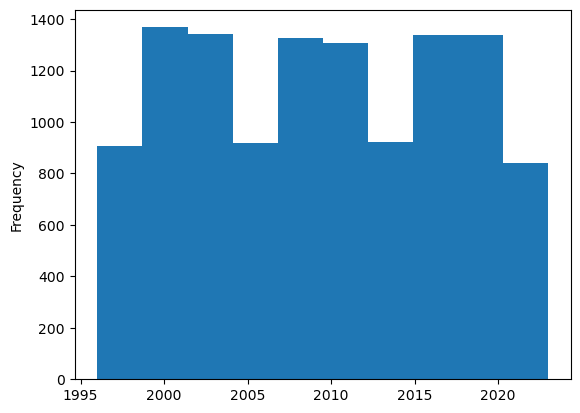

In [12]:
df['wh_est_year'].plot(kind=('hist'))

In [35]:
# imputing the missing value column
df['wh_est_year'].fillna(2009,inplace=True)

In [37]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace= True)

In [39]:
(df["workers_num"].isnull().sum() /len(df['workers_num']))*100

3.959367945823928

In [41]:
df['workers_num'].median ()

28.0

In [43]:
df['workers_num'].mean()

28.93639825130447

In [45]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)
#whenever  we impute mean or median or by any constant value then please ensure imputation must be integer value no decimal 

(33.0, 24.0)

In [47]:
df['workers_num'].fillna(28,inplace=True)

In [55]:
#how to check if any null values
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [59]:
#separate categorical  and numerical  columns
categorical_columns = df.select_dtypes(include ='object')

In [61]:
numerical_columns = df.select_dtypes(exclude ='object')

In [63]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [65]:
numerical_columns

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,2009.0,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,2009.0,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,28.0,2009.0,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,2009.0,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,2009.0,13,0,3,28,15055


In [79]:
df.drop(columns = ['Ware_house_ID','WH_Manager_ID'],axis = 1,inplace = True)


In [81]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [83]:
westzone =df[df['zone']=='west'].value_counts()

<Axes: ylabel='count'>

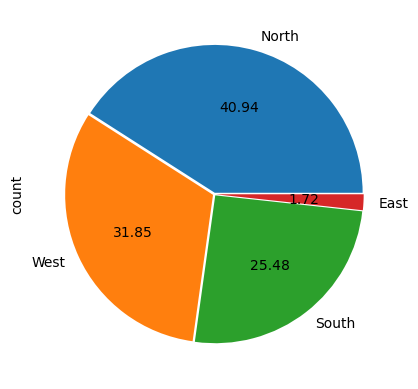

In [85]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode =[0.01,0.01,0.01,0.01])

In [87]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [95]:
df['Location_type'].value_counts()

Location_type
Rural    20334
Urban     1816
Name: count, dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le = LabelEncoder()
df['Location_type']= le.fit_transform(df['Location_type'])

In [107]:
df['Location_type'].value_counts()

Location_type
0    20334
1     1816
Name: count, dtype: int64

In [ ]:
df['WH_capacity_size'] = le,fit_transform(df['w